# CAPSTONE - MSBA - FALL 2024
# GROUP 7- EDA NOTEBOOK

# Introduction

## Project Goal
The goal of this project is to develop a comprehensive understanding of the maintenance activities across various production locations within the organization. Specifically, the focus is on analyzing planned and unplanned maintenance activities to identify patterns and potential areas for operational improvements. This analysis will aid in forecasting machine downtimes more accurately and help in improving preventive maintenance strategies.

## Business Problem
The business problem centers around improving machine reliability and reducing unplanned downtimes, which lead to significant operational inefficiencies and financial losses. By identifying the factors contributing to unplanned maintenance events and comparing them to planned maintenance activities, the organization can enhance its maintenance scheduling and inventory management.

## Analytical Problem
From an analytical perspective, this project aims to:
1. Quantify the distribution of planned and unplanned maintenance activities across different production locations.
2. Explore the relationship between various maintenance attributes, such as maintenance type, location, and frequency, to better understand the factors leading to equipment breakdowns.

## Purpose of the Notebook
The purpose of this Exploratory Data Analysis (EDA) notebook is to investigate and summarize the characteristics of the data, focusing on:
- The distribution of planned vs. unplanned maintenance activities.
- The patterns of maintenance events across production locations.
- The anomalies or inconsistencies in data recording (e.g., maintenance plans associated with unplanned activities).
- The frequency and impact of various maintenance types.

By addressing these questions, the EDA will help uncover insights that can guide future predictive modeling efforts aimed at minimizing unplanned downtimes and optimizing machine maintenance schedules.


# Data Description

### **1. Maintenance and Downtime Tracking**

The dataset records work orders issued for machine maintenance across various production plants. Each work order represents an instance where a machine required attention, either due to planned maintenance or an unplanned breakdown.

ORDER_ID is a unique identifier that helps track each work order in the system. It ensures that each maintenance event can be distinguished and analyzed individually.

EXECUTION_START_DATE and EXECUTION_FINISH_DATE provide the timeline for when the maintenance work began and ended. These timestamps are crucial for understanding how long machines were down and how quickly repairs were conducted.

ACCTUAL_START_TIME, ACTUAL_FINISH_TIME, and ACTUAL_WORK_IN_MINUTES give a more granular breakdown of the specific time taken to fix a machine, offering insights into the efficiency of the maintenance process.



### **2. Types of Maintenance:**

The dataset captures both planned and unplanned maintenance activities.

MAINTENANCE_PLAN indicates if the work order was part of a scheduled or preventive maintenance plan, aiming to fix a machine before it breaks. A null value suggests that the maintenance was unplanned (corrective maintenance).

MAINTENANCE_ACTIVITY_TYPE provides further classification, differentiating between preventive maintenance (work conducted to prevent issues before they happen) and corrective maintenance (repairs conducted after a machine has already failed).



### **3. Equipment and Functional Location:**

The dataset also provides detailed information about the equipment involved and its location within the plant.

PLANT_ID and PRODUCTION_LOCATION identify the specific production plant where the maintenance took place. This information is essential for comparing performance across different plants and understanding if certain locations experience more downtimes.

FUNCTIONAL_LOC and related columns (e.g., FUNCTIONAL_AREA_NODE_X_MODIFIED) break down the location of the equipment into detailed segments such as the production line, subprocess, and even specific machines. This hierarchical structure helps pinpoint exactly which part of the production line experienced downtime.

EQUIPMENT_ID and EQUIPMENT_DESC5 identify the specific equipment or machine component that required maintenance. Understanding which machines break down most frequently or which parts require the most attention is vital for predictive maintenance.



### **4. Maintenance Details:**
Each work order includes details on the nature of the maintenance conducted.

ORDER_DESCRIPTION contains a textual description of the maintenance activity, explaining what work was carried out and potentially the cause of the issue. This information could be used for text analysis to identify common problems.

MAINTENANCE_TYPE_DESCRIPTION categorizes the maintenance activity as either preventive or corrective, providing an additional layer of insight into whether the work was aimed at fixing an existing issue or preventing future breakdowns.

### **5. Predictive Maintenance Potential:**
The data provides a rich foundation for developing predictive maintenance models. By analyzing downtime, maintenance frequency, and parts replacements, it becomes possible to predict when machines are likely to fail and take preemptive action to reduce unplanned downtime.

EQUIP_START_UP_DATE, EQUIP_VALID_FROM, and EQUIP_VALID_TO provide insights into the age and operational lifespan of each machine, which could be correlated with the frequency of breakdowns. Older machines might require more frequent maintenance or exhibit patterns of failure that can be anticipated.



### **6. Business Impact:**
Finally, the dataset allows for the calculation of the business impact of machine downtimes.

ACTUAL_WORK_IN_MINUTES represents the amount of time a machine was out of operation, which directly correlates to lost productivity.

By analyzing the frequency and severity of breakdowns, it becomes possible to estimate the opportunity cost—the amount of lost output during machine downtimes—and how predictive maintenance could mitigate this loss.

# Loading Libraries

In [66]:
# Loading Libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Dataset

In [67]:
# Importing Dataset.
iwc_df = pd.read_csv('/content/drive/MyDrive/IWC_Work_Orders_Extract.csv')

<ipython-input-67-2cacc0752e70>:1: DtypeWarning: Columns (8,11,12,13,14,15,16,17,18,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  iwc_df = pd.read_csv('/content/drive/MyDrive/IWC_Work_Orders_Extract.csv')


# Exploring Statistics of Data

In [68]:
print(iwc_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427264 entries, 0 to 1427263
Data columns (total 25 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   ORDER_ID                         1427264 non-null  int64  
 1   PLANT_ID                         1427264 non-null  object 
 2   PRODUCTION_LOCATION              1427264 non-null  object 
 3   EXECUTION_START_DATE             1427264 non-null  object 
 4   EXECUTION_FINISH_DATE            1427264 non-null  object 
 5   ACTUAL_START_TIME                1427264 non-null  object 
 6   ACTUAL_FINISH_TIME               1427264 non-null  object 
 7   ACTUAL_WORK_IN_MINUTES           1427264 non-null  float64
 8   MAINTENANCE_PLAN                 152594 non-null   object 
 9   MAINTENANCE_ITEM                 152594 non-null   float64
 10  MAINTENANCE_ACTIVITY_TYPE        1427264 non-null  object 
 11  ORDER_DESCRIPTION                291767 non-null  

In [69]:
# Viewing General Statistics of the Raw Dataset.
print(iwc_df.describe())

           ORDER_ID  ACTUAL_WORK_IN_MINUTES  MAINTENANCE_ITEM  EQUIPMENT_ID
count  1.427264e+06            1.427264e+06     152594.000000  2.917950e+05
mean   4.561470e+10            8.862968e+01     115846.807954  3.002609e+08
std    8.387114e+10            8.037915e+02      71325.255687  5.581645e+06
min    1.000219e+08            0.000000e+00      39801.000000  2.000871e+08
25%    4.022602e+08            1.200000e+01      41046.000000  3.000092e+08
50%    7.044271e+08            4.800000e+01     112995.000000  3.000178e+08
75%    1.002343e+09            9.000000e+01     134702.000000  3.000269e+08
max    9.000001e+11            3.301848e+05     346352.000000  4.000290e+08


In [70]:
# Calculating Total Missing Values in the Entire Dataset.
total_missing_values = iwc_df.isnull().sum()
print(total_missing_values)

ORDER_ID                                 0
PLANT_ID                                 0
PRODUCTION_LOCATION                      0
EXECUTION_START_DATE                     0
EXECUTION_FINISH_DATE                    0
ACTUAL_START_TIME                        0
ACTUAL_FINISH_TIME                       0
ACTUAL_WORK_IN_MINUTES                   0
MAINTENANCE_PLAN                   1274670
MAINTENANCE_ITEM                   1274670
MAINTENANCE_ACTIVITY_TYPE                0
ORDER_DESCRIPTION                  1135497
MAINTENANCE_TYPE_DESCRIPTION       1135469
FUNCTIONAL_LOC                     1135482
FUNCTIONAL_AREA_NODE_1_MODIFIED    1137147
FUNCTIONAL_AREA_NODE_2_MODIFIED    1144857
FUNCTIONAL_AREA_NODE_3_MODIFIED    1168573
FUNCTIONAL_AREA_NODE_4_MODIFIED    1189691
FUNCTIONAL_AREA_NODE_5_MODIFIED    1425084
EQUIPMENT_ID                       1135469
EQUIPMENT_DESC                     1347817
EQUIP_CAT_DESC                     1347817
EQUIP_START_UP_DATE                1347817
EQUIP_VALID

In [71]:
# Calculation of the percentage of missing values in the entire dataset.
missing_values_percentage = (iwc_df.isnull().sum() / len(iwc_df)) * 100
print(missing_values_percentage)

ORDER_ID                            0.000000
PLANT_ID                            0.000000
PRODUCTION_LOCATION                 0.000000
EXECUTION_START_DATE                0.000000
EXECUTION_FINISH_DATE               0.000000
ACTUAL_START_TIME                   0.000000
ACTUAL_FINISH_TIME                  0.000000
ACTUAL_WORK_IN_MINUTES              0.000000
MAINTENANCE_PLAN                   89.308635
MAINTENANCE_ITEM                   89.308635
MAINTENANCE_ACTIVITY_TYPE           0.000000
ORDER_DESCRIPTION                  79.557601
MAINTENANCE_TYPE_DESCRIPTION       79.555639
FUNCTIONAL_LOC                     79.556550
FUNCTIONAL_AREA_NODE_1_MODIFIED    79.673207
FUNCTIONAL_AREA_NODE_2_MODIFIED    80.213401
FUNCTIONAL_AREA_NODE_3_MODIFIED    81.875042
FUNCTIONAL_AREA_NODE_4_MODIFIED    83.354656
FUNCTIONAL_AREA_NODE_5_MODIFIED    99.847260
EQUIPMENT_ID                       79.555639
EQUIPMENT_DESC                     94.433616
EQUIP_CAT_DESC                     94.433616
EQUIP_STAR

# Visualizations before Data Cleaning

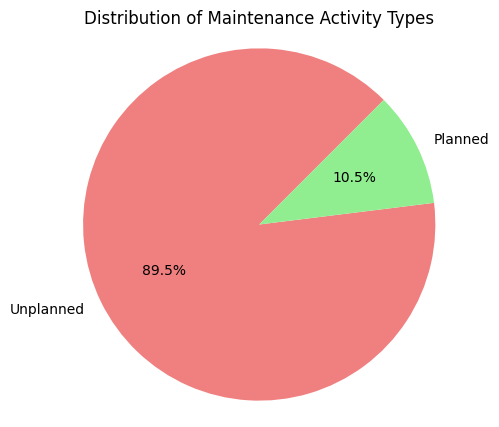

In [72]:
# Counting occurrences of each maintenance activity type
maintenance_activity_counts = iwc_df['MAINTENANCE_ACTIVITY_TYPE'].value_counts()

# Defining custom colors for planned and unplanned maintenance types
colors = ['lightcoral', 'lightgreen']  # lightgreen for planned, lightcoral for unplanned

# Plotting the pie chart
plt.figure(figsize=(5,5))
plt.pie(maintenance_activity_counts, labels=maintenance_activity_counts.index, autopct='%1.1f%%', startangle=45, colors=colors)
plt.title('Distribution of Maintenance Activity Types')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


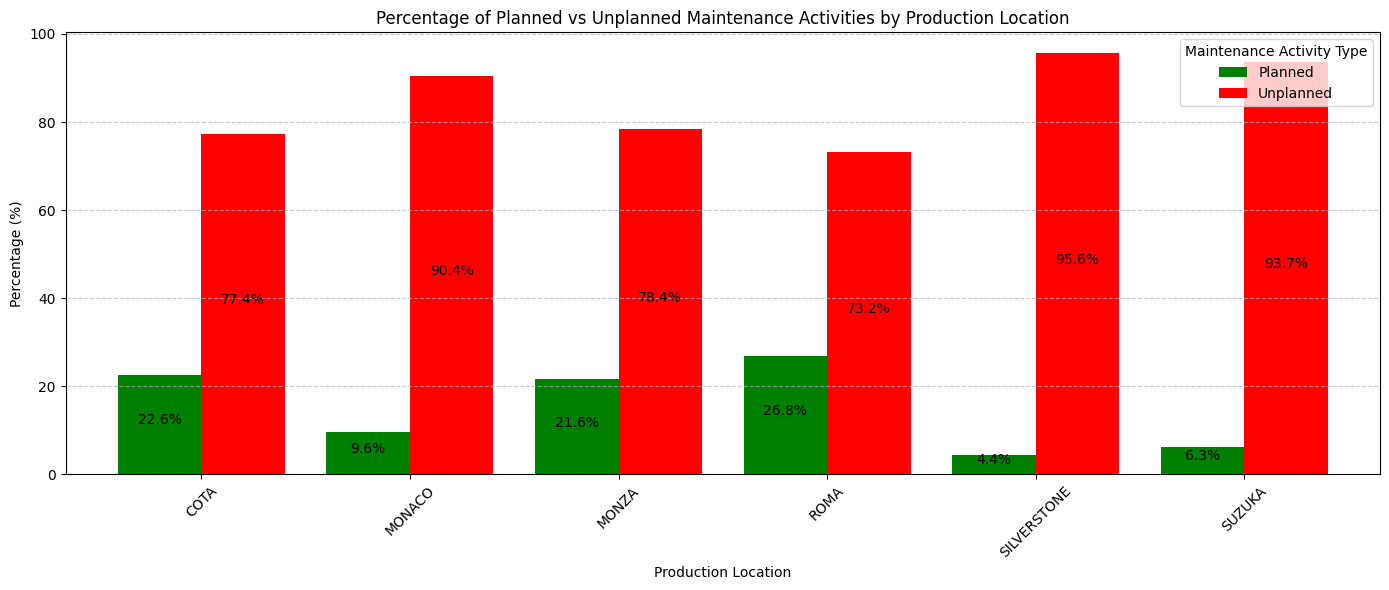

In [73]:


# Group the data by Production Location and Maintenance Activity Type, then count the occurrences
grouped_data = iwc_df.groupby(['PRODUCTION_LOCATION', 'MAINTENANCE_ACTIVITY_TYPE']).size().reset_index(name='Count')

# Calculate the total counts for each production location
total_counts = grouped_data.groupby('PRODUCTION_LOCATION')['Count'].transform('sum')

# Calculate the percentage of each maintenance activity type within each production location
grouped_data['Percentage'] = (grouped_data['Count'] / total_counts) * 100

# Pivot the data to create columns for each maintenance activity type with percentages
pivot_data = grouped_data.pivot(index='PRODUCTION_LOCATION', columns='MAINTENANCE_ACTIVITY_TYPE', values='Percentage').fillna(0)

# Define custom colors for the bars
custom_colors = ['green', 'red']

# Plotting the grouped bar plot with custom colors
ax = pivot_data.plot(kind='bar', figsize=(14, 6), color=custom_colors, width=0.8)
plt.title('Percentage of Planned vs Unplanned Maintenance Activities by Production Location')
plt.xlabel('Production Location')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Maintenance Activity Type', loc='upper right')

# Annotate each bar with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, padding=3)

plt.tight_layout()
plt.show()


In [74]:
# Converting Actual_Work_in_Minutes in to Hour to standardize time unit for comparison.

# 1. Generating a copy of the dataframe
iwc_df_copy = iwc_df.copy()

# 2. Converting 'ACTUAL_WORK_IN_MINUTES' into hours and creating a new column
iwc_df_copy['ACTUAL_WORK_IN_HOURS'] = iwc_df_copy['ACTUAL_WORK_IN_MINUTES'] / 60

# 3. Displaying the first few rows to verify the conversion
iwc_df_copy[['ACTUAL_WORK_IN_MINUTES', 'ACTUAL_WORK_IN_HOURS']].head()


,ACTUAL_WORK_IN_MINUTES,ACTUAL_WORK_IN_HOURS
0,390.0,6.5
1,420.0,7.0
2,30.0,0.5
3,60.0,1.0
4,120.0,2.0


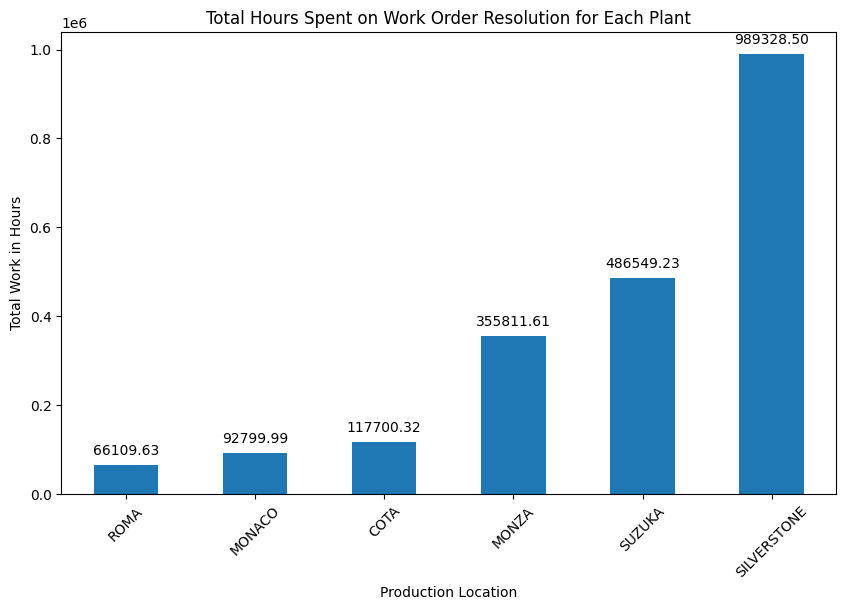

In [75]:
# Visualizing the number of Hours of the Work Orders in each production Plant.

# Grouping by PLANT_ID to sum the 'ACTUAL_WORK_IN_HOURS' for each plant and sorting in ascending order
work_hours_per_plant = iwc_df_copy.groupby('PRODUCTION_LOCATION')['ACTUAL_WORK_IN_HOURS'].sum().sort_values(ascending=True)

# Plotting the graph
plt.figure(figsize=(10,6))
ax = work_hours_per_plant.plot(kind='bar')
plt.title('Total Hours Spent on Work Order Resolution for Each Plant')
plt.xlabel('Production Location')
plt.ylabel('Total Work in Hours')
plt.xticks(rotation=45)

# Adding labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

<ipython-input-76-1aebab7f2e8c>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=iwc_df_copy, x='YEAR', y='ACTUAL_WORK_HOURS', ci=None, estimator='mean', marker='o')


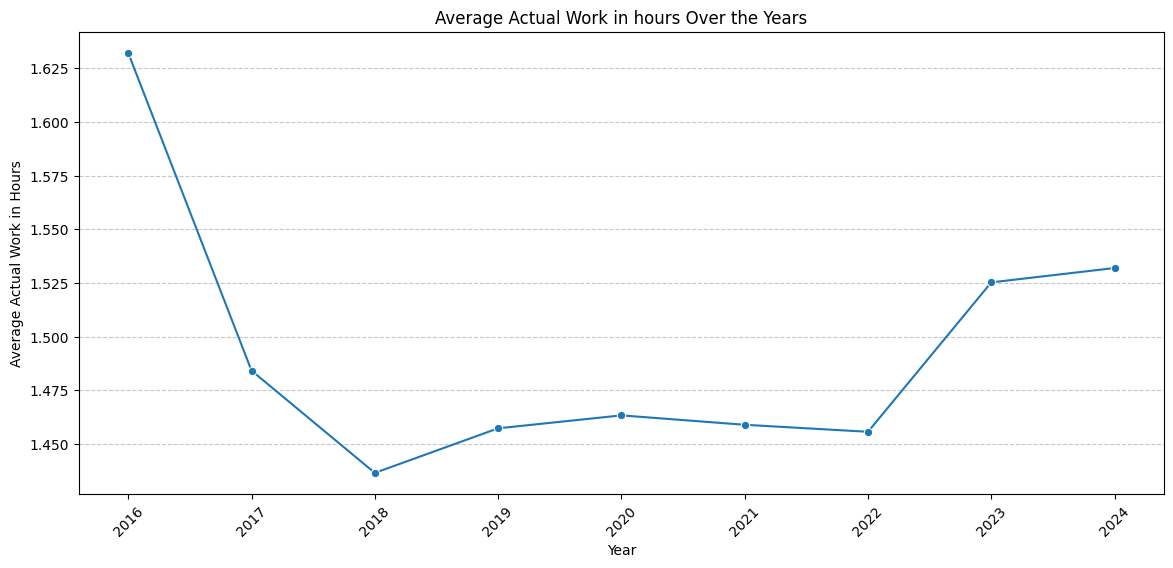

In [76]:
# Plotting a Line Plot with trend lines to show the average work time per year


# Ensure date columns are in datetime format
iwc_df_copy['EXECUTION_FINISH_DATE'] = pd.to_datetime(iwc_df_copy['EXECUTION_FINISH_DATE'])

# Convert actual work minutes to hours
iwc_df_copy['ACTUAL_WORK_HOURS'] = iwc_df_copy['ACTUAL_WORK_IN_MINUTES'] / 60  # Convert minutes to hours

# Extract year from the execution finish date
iwc_df_copy['YEAR'] = iwc_df_copy['EXECUTION_FINISH_DATE'].dt.year


# Plotting a Line Plot with trend lines to show the average work time per year
plt.figure(figsize=(14, 6))
sns.lineplot(data=iwc_df_copy, x='YEAR', y='ACTUAL_WORK_HOURS', ci=None, estimator='mean', marker='o')
plt.title('Average Actual Work in hours Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Actual Work in Hours')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

In [77]:
# Counting the various types of Maintainence Type.
iwc_df_copy['MAINTENANCE_TYPE_DESCRIPTION'].value_counts()

,count
MAINTENANCE_TYPE_DESCRIPTION,
Preventive Maintenance Order,151533
Corrective Maintenance Order,134074
Administrative Order,6161
Capital Order,22
Breakdown Maintenance Order,5


<Figure size 600x300 with 0 Axes>

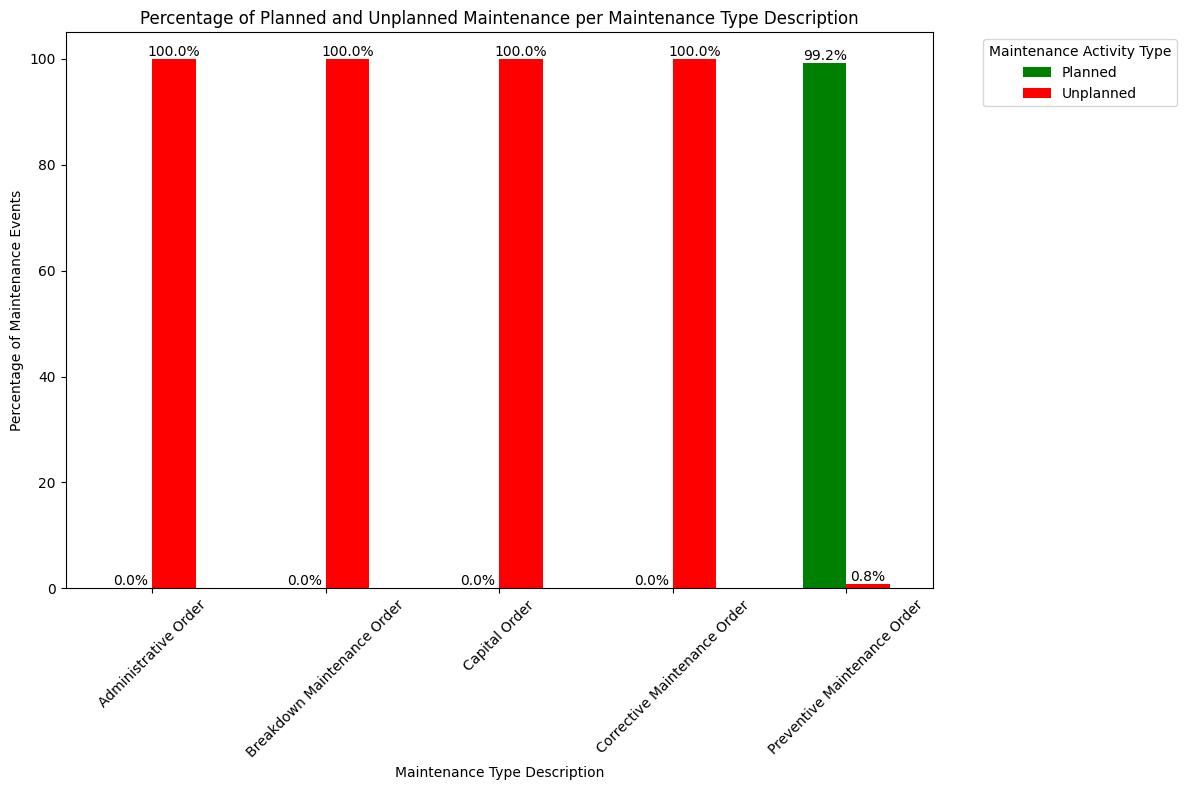

In [78]:
# Grouping by 'MAINTENANCE_TYPE_DESCRIPTION' and 'MAINTENANCE_ACTIVITY_TYPE' and counting occurrences
maintenance_type_activity_counts = iwc_df_copy.groupby(['MAINTENANCE_TYPE_DESCRIPTION', 'MAINTENANCE_ACTIVITY_TYPE']).size().unstack()

# Calculating percentages for each maintenance type description
maintenance_type_activity_percent = maintenance_type_activity_counts.div(maintenance_type_activity_counts.sum(axis=1), axis=0) * 100

# Plotting the grouped bar chart
plt.figure(figsize=(6,3))
ax = maintenance_type_activity_percent.plot(kind='bar', stacked=False, figsize=(12, 8), color=['green', 'red'])

plt.title('Percentage of Planned and Unplanned Maintenance per Maintenance Type Description')
plt.xlabel('Maintenance Type Description')
plt.ylabel('Percentage of Maintenance Events')
plt.xticks(rotation=45)

# Adding percentage labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.legend(title='Maintenance Activity Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**INTERPRETATION:**

As we observe that there are almost 80% missing values in the variable "Maintenance_Type_Description", we need to impute the missing values with "Breakdown Maintenance Order" as the count of the same is just 5 entries in the total dataset and as per the above graph all are unplanned maintainence activites, hence it is logical to impute all the missing values with "Breakdown Maintenance Order" as we are aiming to reduced the downtime of the machine by forecasting the breaking of the machine accurately.

In [79]:
# Imputation of Missing Values of " Maintenance_Type_Description" (80% Missing Values)

# Checking for missing values in the 'MAINTENANCE_TYPE_DESCRIPTION' column
print(iwc_df_copy['MAINTENANCE_TYPE_DESCRIPTION'].isnull().sum())

# Imputing missing values with 'Breakdown Maintenance Order'
iwc_df_copy['MAINTENANCE_TYPE_DESCRIPTION'].fillna('Breakdown Maintenance Order', inplace=True)

# Verifying the imputation
print(iwc_df_copy['MAINTENANCE_TYPE_DESCRIPTION'].isnull().sum())


1135469


<ipython-input-79-e5d182b549de>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  iwc_df_copy['MAINTENANCE_TYPE_DESCRIPTION'].fillna('Breakdown Maintenance Order', inplace=True)


0


In [80]:
# Checking for rows where MAINTENANCE_ACTIVITY_TYPE is 'Unplanned' but 'MAINTENANCE_PLAN' is not null
unplanned_with_plan = iwc_df_copy[(iwc_df_copy['MAINTENANCE_ACTIVITY_TYPE'] == 'Unplanned') & (iwc_df_copy['MAINTENANCE_PLAN'].notnull())]

# Counting such instances distributed over the production location
unplanned_with_plan_by_location = unplanned_with_plan.groupby('PRODUCTION_LOCATION').size()

# Display the result
print(unplanned_with_plan_by_location)


PRODUCTION_LOCATION
COTA              4
MONZA          2118
ROMA             33
SILVERSTONE      49
SUZUKA            3
dtype: int64


**Interpretation:**

According to the data dictionary, when the `MAINTENANCE_PLAN` is null, the event should be categorized as unplanned, and vice versa. However, upon reviewing the data, we identified 2,207 instances where unplanned maintenance events were incorrectly associated with a maintenance plan, distributed across the six production locations. This discrepancy indicates potential inaccuracies in the way work orders are recorded at these production plants. These cases warrant special attention, as they suggest abnormal behavior in what should have been "planned breakdowns." While this variable may not be directly useful for modeling, as the relevant information is already captured in the `MAINTENANCE_ACTIVITY_TYPE` variable (planned or unplanned), it offers valuable operational insights. Specifically, it highlights the need for more robust preventive measures and accurate recording of work order entries to enhance operational efficiency.

In [81]:
# Checking for rows where MAINTENANCE_ACTIVITY_TYPE is 'Unplanned' but 'MAINTENANCE_ITEM' is not null
unplanned_with_item = iwc_df_copy[(iwc_df_copy['MAINTENANCE_ACTIVITY_TYPE'] == 'Unplanned') & (iwc_df_copy['MAINTENANCE_ITEM'].notnull())]

# Counting such instances distributed over the production location
unplanned_with_item_by_location = unplanned_with_item.groupby('PRODUCTION_LOCATION').size()

# Display the result
print(unplanned_with_item_by_location)


PRODUCTION_LOCATION
COTA              4
MONZA          2118
ROMA             33
SILVERSTONE      49
SUZUKA            3
dtype: int64


**INTREPRETATION:**

A similar situation was observed with the MAINTENANCE_ITEM variable. Although a null value indicates unplanned maintenance, there were instances where unplanned events were associated with a maintenance item. These cases also suggest potential inaccuracies in the data recording process and should be addressed to improve data reliability and operational efficiency.

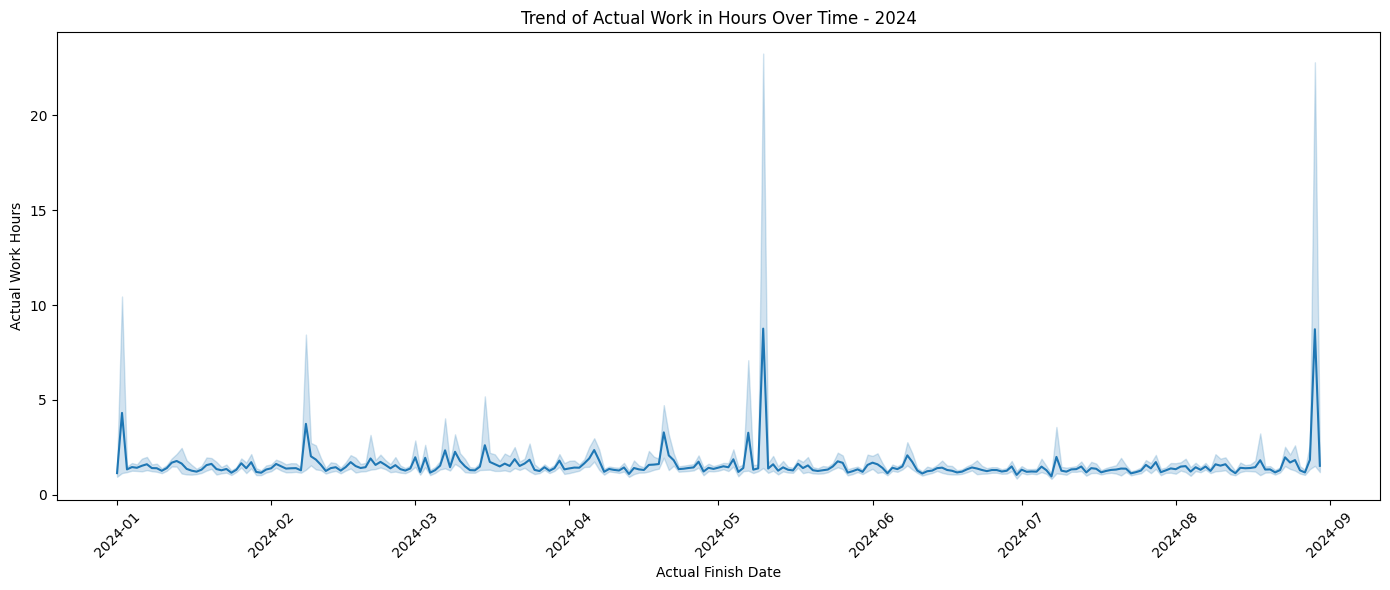

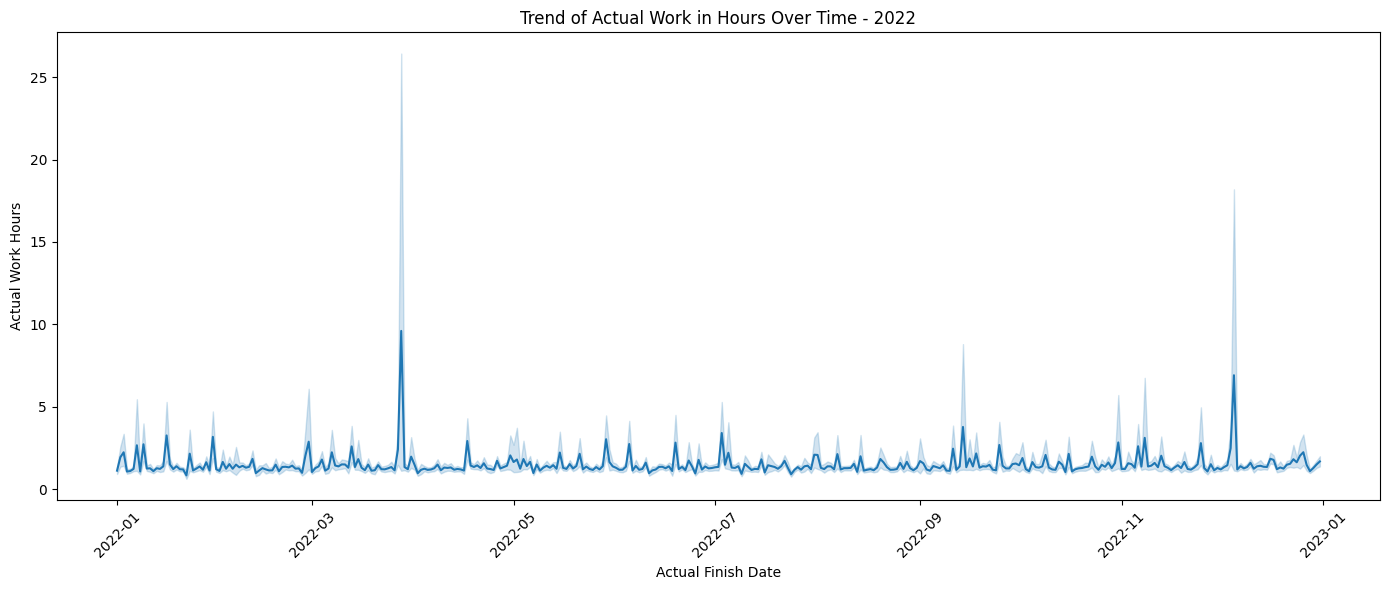

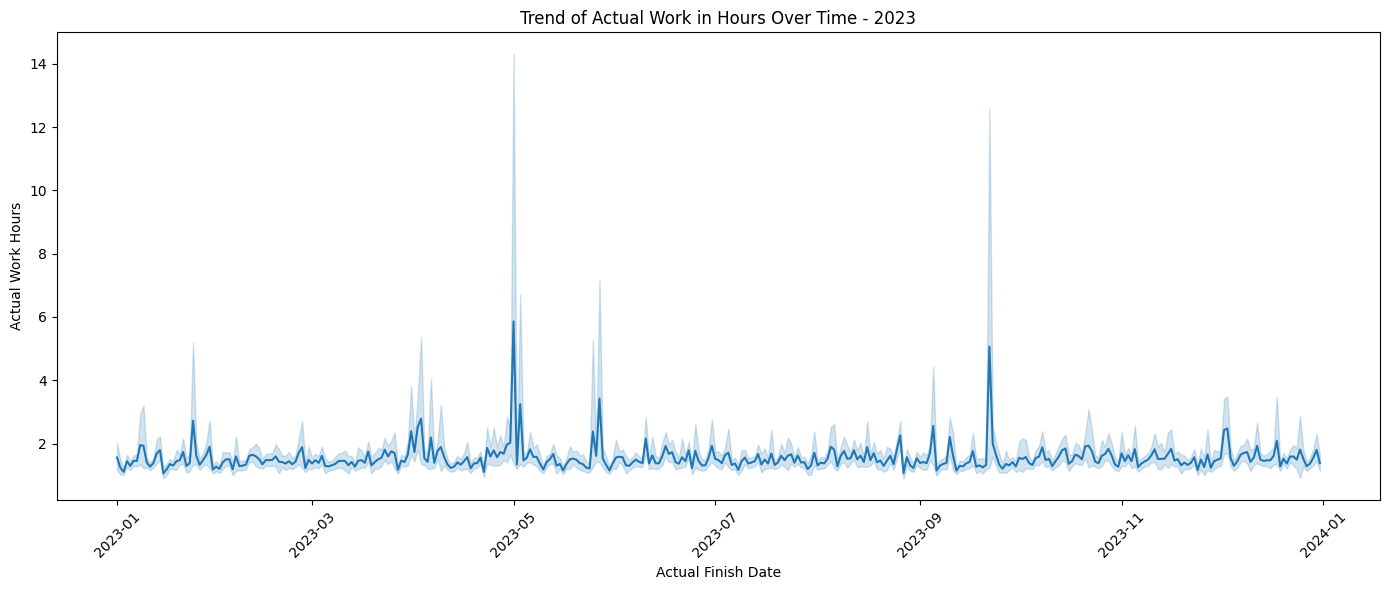

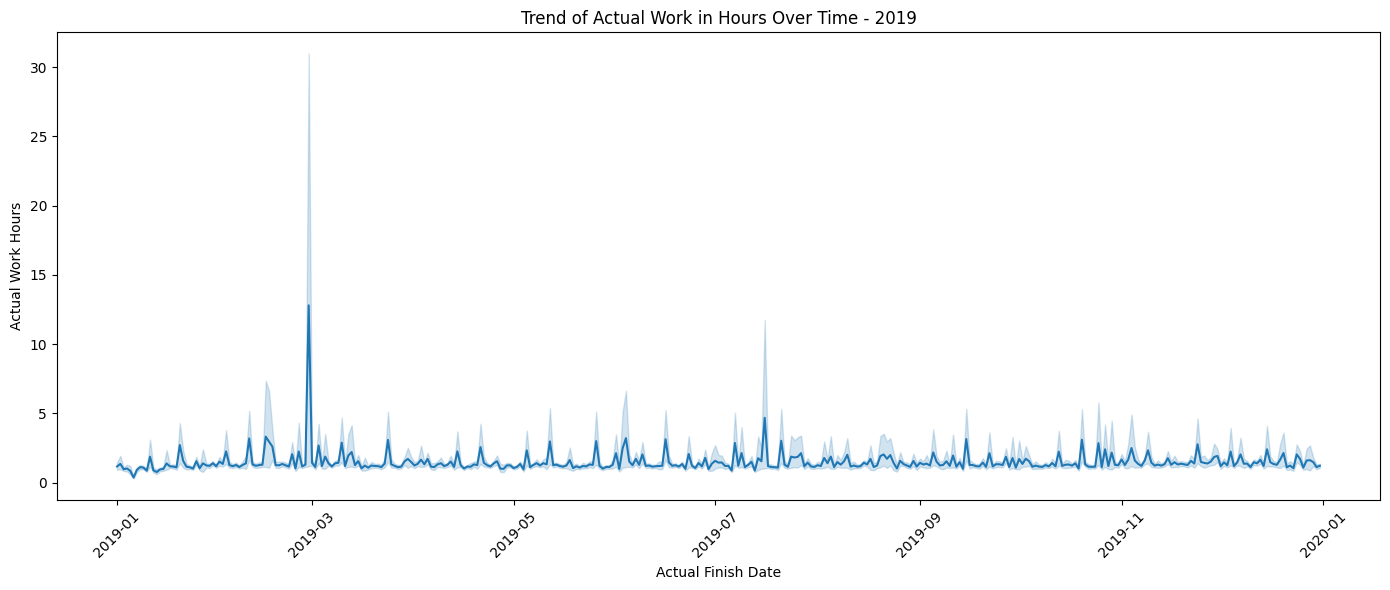

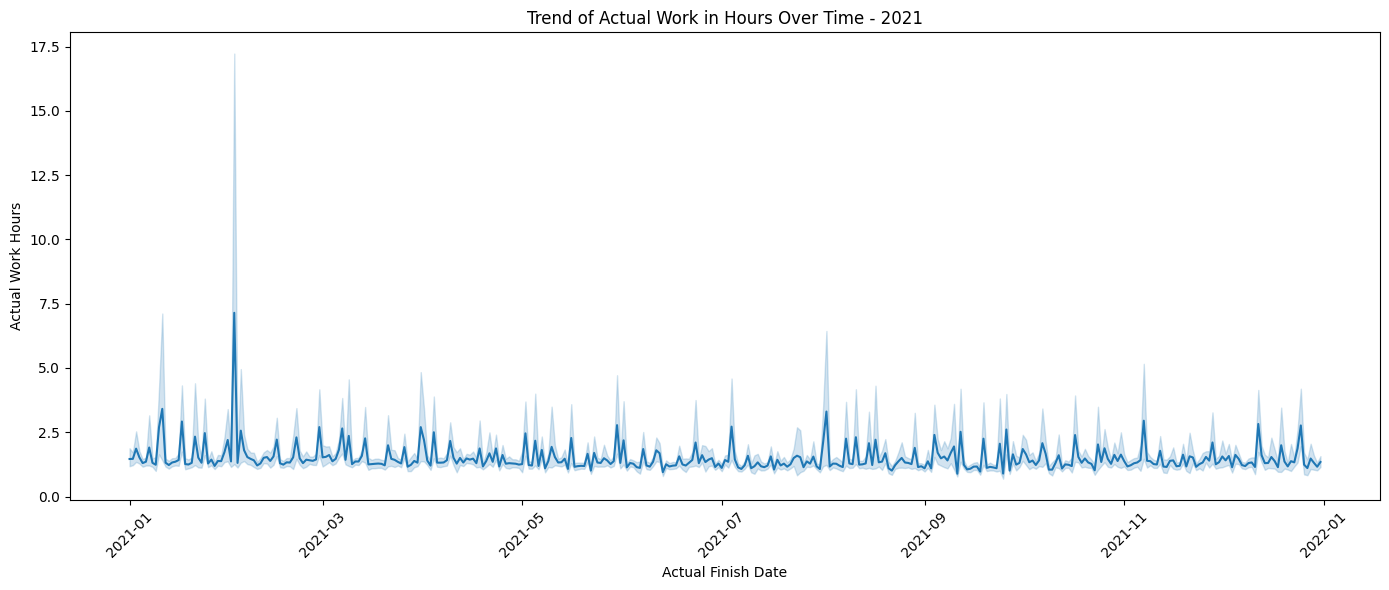

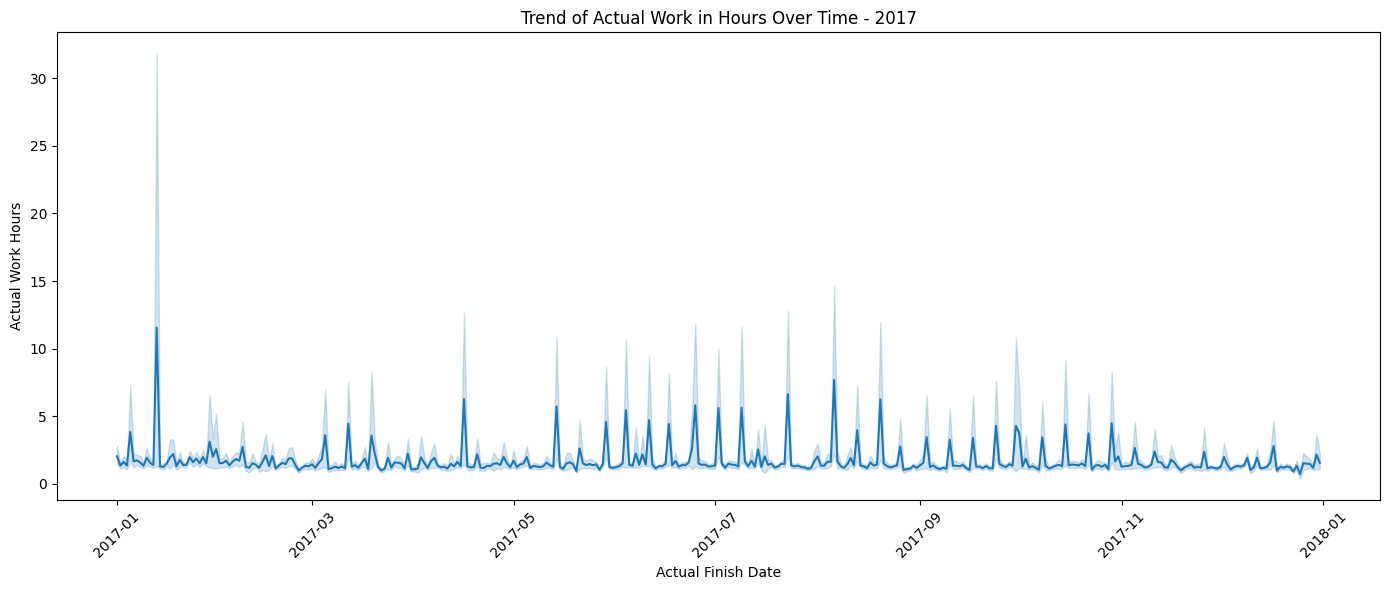

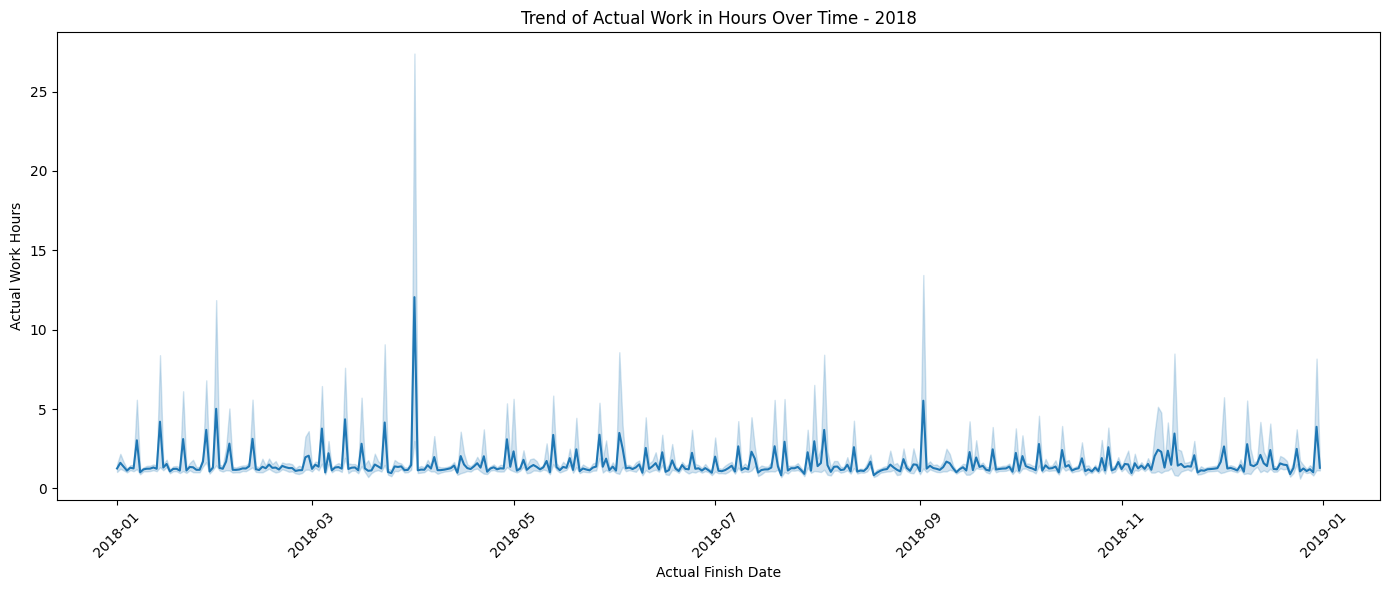

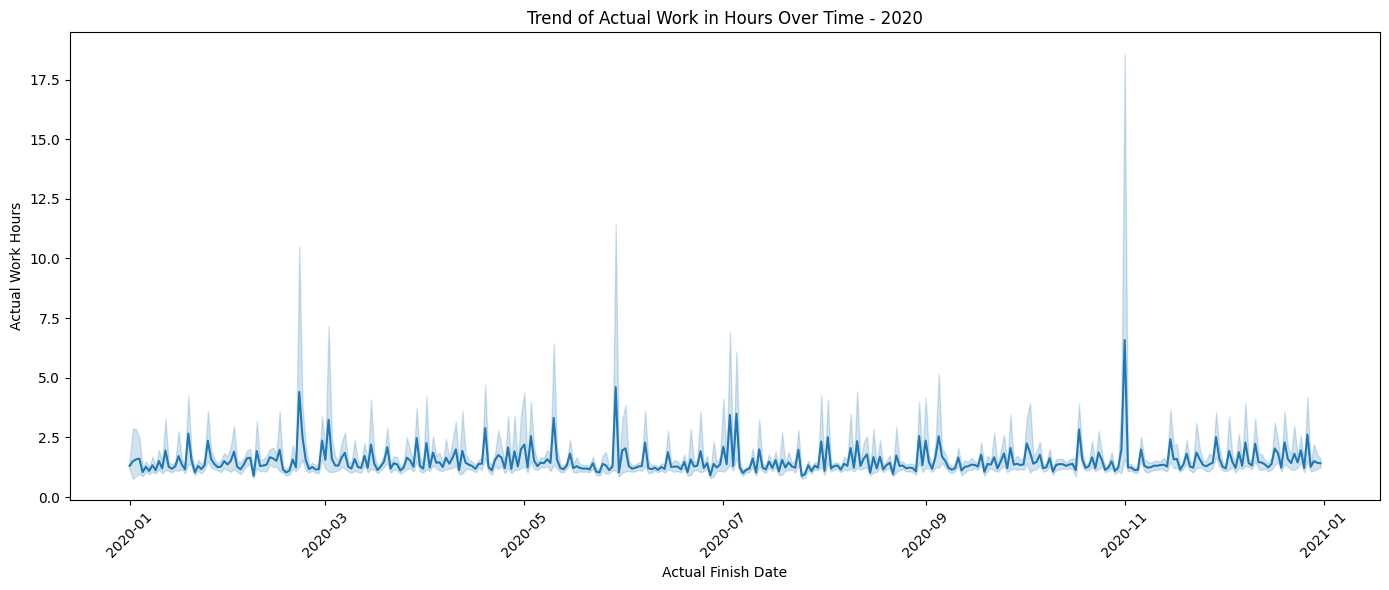

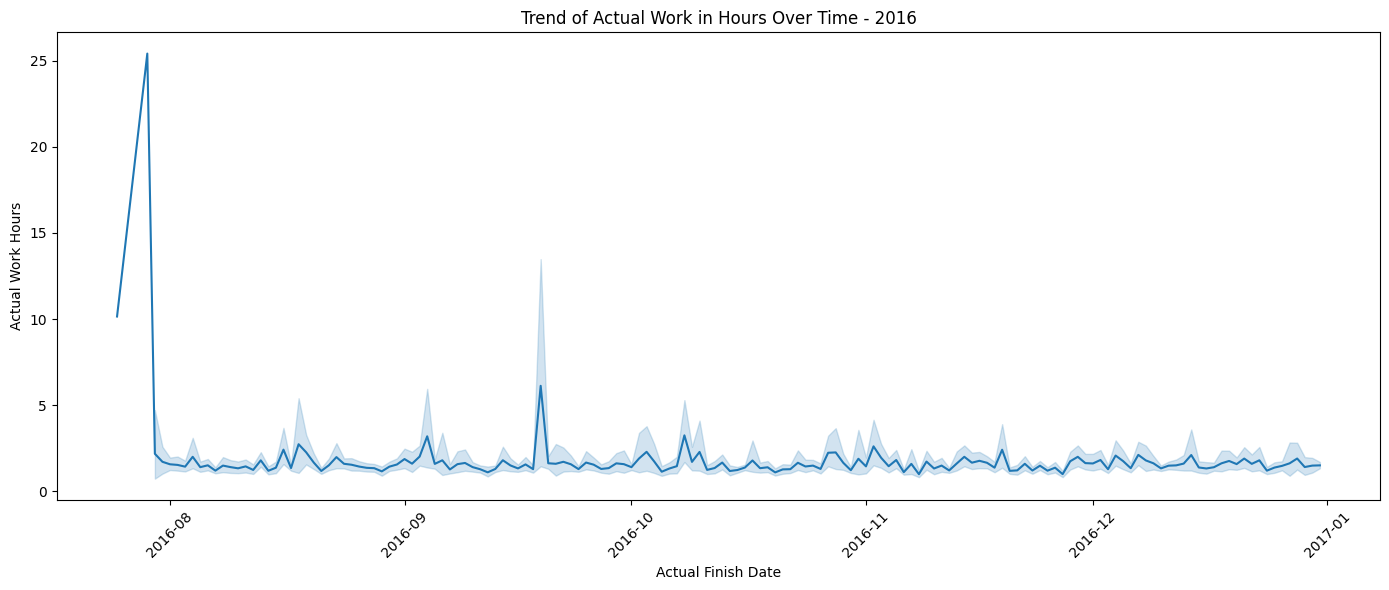

In [82]:
# Plotting the trend of actual work hours over time, separated by year

# Ensure date columns are in datetime format
iwc_df_copy['EXECUTION_FINISH_DATE'] = pd.to_datetime(iwc_df_copy['EXECUTION_FINISH_DATE'])  # Replace with the correct column name

# Convert actual work minutes to hours
iwc_df_copy['ACTUAL_WORK_HOURS'] = iwc_df_copy['ACTUAL_WORK_IN_MINUTES'] / 60  # Convert minutes to hours

# Extract year from the execution finish date
iwc_df_copy['YEAR'] = iwc_df_copy['EXECUTION_FINISH_DATE'].dt.year

# Get unique years to plot separate graphs for each year
unique_years = iwc_df_copy['YEAR'].unique()

# Plotting the trend of actual work hours over time, separated by year
for year in unique_years:
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=iwc_df_copy[iwc_df_copy['YEAR'] == year], x='EXECUTION_FINISH_DATE', y='ACTUAL_WORK_HOURS')  # Corrected column name
    plt.title(f'Trend of Actual Work in Hours Over Time - {year}')
    plt.xlabel('Actual Finish Date')
    plt.ylabel('Actual Work Hours')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# **Data Cleaning and Data Manipulation**

In [43]:
# Dropping all the rows with "Equipment_ID" as NaN.
cleaned_data = iwc_df_copy.dropna(subset=['EQUIPMENT_ID'])

In [44]:
# Imputing 'FUNCTIONAL_AREA_NODE_1_MODIFIED'


cleaned_data['FUNCTIONAL_AREA_NODE_1_MODIFIED'].value_counts()
cleaned_data.loc[cleaned_data['PRODUCTION_LOCATION']=='MONACO']['FUNCTIONAL_AREA_NODE_1_MODIFIED'].unique()
cleaned_data.loc[(cleaned_data['PRODUCTION_LOCATION'] == 'MONACO'),'FUNCTIONAL_AREA_NODE_1_MODIFIED'] = 'MONACO PRODUCTION'
cleaned_data.loc[cleaned_data['PRODUCTION_LOCATION']=='MONZA']['FUNCTIONAL_AREA_NODE_1_MODIFIED'].unique()
cleaned_data.loc[(cleaned_data['PRODUCTION_LOCATION'] == 'MONZA') & (cleaned_data['FUNCTIONAL_AREA_NODE_1_MODIFIED'].isna()),'FUNCTIONAL_AREA_NODE_1_MODIFIED'] = 'MONZA PRODUCTION'
cleaned_data.loc[(cleaned_data['PRODUCTION_LOCATION'] == 'ROMA') & (cleaned_data['FUNCTIONAL_AREA_NODE_1_MODIFIED']=='PRODUCTION'),'FUNCTIONAL_AREA_NODE_1_MODIFIED'] = 'ROMA PRODUCTION'
cleaned_data.loc[cleaned_data['PRODUCTION_LOCATION']=='SILVERSTONE']['FUNCTIONAL_AREA_NODE_1_MODIFIED'].unique()
cleaned_data.loc[(cleaned_data['PRODUCTION_LOCATION'] == 'SILVERSTONE') & (cleaned_data['FUNCTIONAL_AREA_NODE_1_MODIFIED'].isna()),
       'FUNCTIONAL_AREA_NODE_1_MODIFIED'] = 'SILVERSTONE PRODUCTION'
cleaned_data.loc[cleaned_data['PRODUCTION_LOCATION']=='COTA']['FUNCTIONAL_AREA_NODE_1_MODIFIED'].unique()
cleaned_data.loc[(cleaned_data['PRODUCTION_LOCATION'] == 'COTA'),
       'FUNCTIONAL_AREA_NODE_1_MODIFIED'] = 'COTA PRODUCTION'



In [45]:
# Imputing 'FUNCTIONAL_AREA_NODE_2_MODIFIED'

cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].nunique()
cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].value_counts()
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'AIR', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'AIR SYSTEM'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'CO2', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'CO2 SYSTEM'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'BOTTLE', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'BOTTLE LINE'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'CAN', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'CAN LINE'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'REFRIGERATION', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'REFRIGERATION SYSTEMS'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'BLENDING', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'BLENDING ROOM'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'CIP', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'CIP SYSTEMS'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'WATER', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'WATER TREATMENT'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'FACILITIES', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'FACILITIES'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'WAREHOUSE', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'WAREHOUSE'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'PRODUCTION', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'PRODUCTION'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'QUALITY', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'QUALITY ASSURANCE EQUIPMENT'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'SAFETY', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'SAFETY EQUIPMENT'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'BTL_PET', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'BTL_PET_LINE '
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'RECYCLING', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'RECYCLING'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'PRD LINES', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'PRD LINES'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'STEAM', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'STEAM SYSTEMS'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'SANITATION', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'SANITATION SYSTEMS'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'BIB', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'BIB LINE'


In [46]:
# Verifying Modified Data
cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].nunique()
cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].value_counts()

,count
FUNCTIONAL_AREA_NODE_2_MODIFIED,
CAN LINE,103525
BOTTLE LINE,87885
BTL_PET_LINE,43989
AIR SYSTEM,9366
WATER TREATMENT,6631
BLENDING ROOM,5274
REFRIGERATION SYSTEMS,4402
COMMON EQUIPMENT,3069
RECYCLING,2775


In [47]:
# Funtional Location

cleaned_data.loc[cleaned_data['EQUIPMENT_ID'] == 300026806, 'FUNCTIONAL_LOC'] = 'G816-PRD-L15-L03-L130'
cleaned_data.loc[cleaned_data['EQUIPMENT_ID'] == 300045068, 'FUNCTIONAL_LOC'] = 'G811-PRD-L30-L03-L030'
cleaned_data.loc[cleaned_data['EQUIPMENT_ID'] == 300001115, 'FUNCTIONAL_LOC'] = 'G291-PRD-L30-L01-L070'
cleaned_data.loc[cleaned_data['EQUIPMENT_ID'] == 400002825, 'FUNCTIONAL_LOC'] = 'G261-PRD-P25-XXX'
cleaned_data.loc[cleaned_data['EQUIPMENT_ID'] == 400002842, 'FUNCTIONAL_LOC'] = 'G261-PRD-P42-XXX'

In [48]:
# FUncational_AREA_NODE_2_MODIFIED


# Group by relevant columns
grouped = cleaned_data.groupby(
    ['EQUIPMENT_ID', 'MAINTENANCE_PLAN', 'MAINTENANCE_ITEM', 'FUNCTIONAL_AREA_NODE_1_MODIFIED']
)['FUNCTIONAL_AREA_NODE_2_MODIFIED']

# Fill NaN values within each group using ffill and bfill
cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'] = (grouped.transform(lambda x: x.ffill().bfill()).combine_first(cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED']))

<ipython-input-48-0635d675fbc7>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'] = (grouped.transform(lambda x: x.ffill().bfill()).combine_first(cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED']))
<ipython-input-48-0635d675fbc7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'] = (grouped.transform(lambda x: x.ffill().bfill()).combine_first(cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED']))


In [49]:
#FUNCTIONAL_AREA_NODE_2_MODIFIED


condition = (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna()) | (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() == '')
check_condition = condition & (cleaned_data['ORDER_DESCRIPTION'].str.contains(r'\b(?:check|daily|utility|utilities|meetings|meeting|Line Walk|cleaing)\b', case=False, na=False))

# Fill FUNCTIONAL_AREA_NODE_2_MODIFIED with 'Routine Check' where the condition is met
cleaned_data.loc[check_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'Routine Check'


# Adding specific match for 'lube' and 'oil' using word boundaries
lube_oil_condition = condition & (cleaned_data['ORDER_DESCRIPTION'].str.contains(r'\b(?:lube|oil)\b', case=False, na=False))

# Fill FUNCTIONAL_AREA_NODE_2_MODIFIED with 'Lubrication' where the condition is met
cleaned_data.loc[lube_oil_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'LUBRICATION'



# Can Line Update
# FUNCTIONAL_AREA_NODE_2_MODIFIED
null_or_blank_condition = cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna() | (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() == '')

condition = (cleaned_data['ORDER_DESCRIPTION'].str.contains('CAN', case=False, na=False))
a=condition&null_or_blank_condition
cleaned_data.loc[a, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'CAN LINE'


condition2 = (cleaned_data['ORDER_DESCRIPTION'].str.contains('CNG', case=False, na=False))

b=condition2&null_or_blank_condition

cleaned_data.loc[b, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'REFRIGERATION SYSTEMS'



condition3 = (cleaned_data['ORDER_DESCRIPTION'].str.contains('Tank', case=False, na=False))

# Additional condition to check for 'COTA' in FUNCTIONAL_AREA_NODE_1_MODIFIED
cota_condition = cleaned_data['FUNCTIONAL_AREA_NODE_1_MODIFIED'].str.contains('COTA', case=False, na=False)

# Combine both conditions
combined_condition = condition3 & cota_condition & null_or_blank_condition

cleaned_data.loc[combined_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'WATER TREATMENT'




condition4 = (cleaned_data['ORDER_DESCRIPTION'].str.contains('PUMP', case=False, na=False))

# Condition to check if FUNCTIONAL_AREA_NODE_2_MODIFIED is null or blank

combined_condition = condition4 & cota_condition & null_or_blank_condition

# Update FUNCTIONAL_AREA_NODE_2_MODIFIED where all conditions are met
cleaned_data.loc[combined_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'BLENDING ROOM'

condition6 = (cleaned_data['ORDER_DESCRIPTION'].str.contains('SYRUP', case=False, na=False))
combined_condition = condition6  & null_or_blank_condition
cleaned_data.loc[combined_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'BLENDING ROOM'




monaco_condition = cleaned_data['FUNCTIONAL_AREA_NODE_1_MODIFIED'].str.contains('MONACO', case=False, na=False)

condition5 = (cleaned_data['ORDER_DESCRIPTION'].str.contains('DEPALLETIZER', case=False, na=False))

# Condition to check if FUNCTIONAL_AREA_NODE_2_MODIFIED is null or blank

# Combine all conditions
combined_condition = condition5 & monaco_condition & null_or_blank_condition

# Update FUNCTIONAL_AREA_NODE_2_MODIFIED where all conditions are met
cleaned_data.loc[combined_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'CAN LINE'



condition7 = (cleaned_data['ORDER_DESCRIPTION'].str.contains('SILO', case=False, na=False))
combined_condition = condition7  & null_or_blank_condition
cleaned_data.loc[combined_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'BTL_PET_LINE'



condition8 = (cleaned_data['ORDER_DESCRIPTION'].str.contains('Bastian', case=False, na=False))
combined_condition = condition8  & null_or_blank_condition
cleaned_data.loc[combined_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'AIR SYSTEM'


# Additional condition for "syrup" and "room" both in the ORDER_DESCRIPTION
syrup_room_condition = condition & (cleaned_data['ORDER_DESCRIPTION'].str.contains(r'\bsyrup\b', case=False, na=False)) & (cleaned_data['ORDER_DESCRIPTION'].str.contains(r'\broom\b', case=False, na=False))

# Fill FUNCTIONAL_AREA_NODE_2_MODIFIED with 'BLENDING ROOM' where 'syrup' and 'room' are both in the ORDER_DESCRIPTION
cleaned_data.loc[syrup_room_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'BLENDING ROOM'

# Grouping by EQUIPMENT_ID and counting the number of N/A or blank values in FUNCTIONAL_AREA_NODE_2_MODIFIED
na_blank_counts = cleaned_data[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna() | (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() == '')]
equipment_na_counts = na_blank_counts.groupby('EQUIPMENT_ID').size().reset_index(name='na_blank_count')

# Sorting the result to find the EQUIPMENT_ID with the most N/A or blank values
equipment_na_counts_sorted = equipment_na_counts.sort_values(by='na_blank_count', ascending=False)

# Displaying the top 5 EQUIPMENT_IDs with the most N/A or blank values
equipment_na_counts_sorted.head()









,EQUIPMENT_ID,na_blank_count
38,300017654.0,1587
131,300224439.0,1202
136,300239802.0,187
46,300026992.0,79
125,300045283.0,68


In [50]:
# Step 1: Find rows where FUNCTIONAL_AREA_NODE_2_MODIFIED is not null or blank, to use for matching
non_null_functional_area = cleaned_data[~(cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna() | (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() == ''))]

# Create a mapping of FUNCTIONAL_LOC to FUNCTIONAL_AREA_NODE_2_MODIFIED from non-null rows
functional_loc_map = dict(zip(non_null_functional_area['FUNCTIONAL_LOC'], non_null_functional_area['FUNCTIONAL_AREA_NODE_2_MODIFIED']))

# Step 2: Filter rows where FUNCTIONAL_AREA_NODE_2_MODIFIED is null or blank and FUNCTIONAL_LOC exists
null_functional_area = cleaned_data[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna() | (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() == '')]

# Step 3: Check if FUNCTIONAL_LOC exists in the mapping (before filling)
preview_fill = null_functional_area[null_functional_area['FUNCTIONAL_LOC'].isin(functional_loc_map.keys())]

# Step 4: Preview the results before filling
preview_fill[['FUNCTIONAL_LOC', 'FUNCTIONAL_AREA_NODE_2_MODIFIED']].head()


# Step 4: Provide unique FUNCTIONAL_LOC and FUNCTIONAL_AREA_NODE_2_MODIFIED pairs before filling
unique_preview_fill = preview_fill[['FUNCTIONAL_LOC', 'FUNCTIONAL_AREA_NODE_2_MODIFIED']].drop_duplicates()

# Display unique FUNCTIONAL_LOC and FUNCTIONAL_AREA_NODE_2_MODIFIED pairs
print(unique_preview_fill)


# Step 1: Filter rows where FUNCTIONAL_AREA_NODE_2_MODIFIED is N/A or blank
na_or_blank_functional_area = cleaned_data[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna() | (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() == '')]

# Step 2: Extract ORDER_DESCRIPTION as a list of sentences from these rows
blank_sentences = na_or_blank_functional_area['ORDER_DESCRIPTION'].dropna().tolist()

# Step 3: Filter rows where FUNCTIONAL_AREA_NODE_2_MODIFIED is not blank (filled)
filled_functional_area = cleaned_data[~(cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna()) & (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() != '')]

# Step 4: Create a mapping of ORDER_DESCRIPTION to FUNCTIONAL_AREA_NODE_2_MODIFIED from filled rows
description_to_functional_area_map = dict(zip(filled_functional_area['ORDER_DESCRIPTION'], filled_functional_area['FUNCTIONAL_AREA_NODE_2_MODIFIED']))

# Step 5: Compare sentences and infer FUNCTIONAL_AREA_NODE_2_MODIFIED for blank rows
for sentence in blank_sentences:
    if sentence in description_to_functional_area_map:
        # Find matching sentence and assign the corresponding FUNCTIONAL_AREA_NODE_2_MODIFIED
        cleaned_data.loc[cleaned_data['ORDER_DESCRIPTION'] == sentence, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = description_to_functional_area_map[sentence]

# Step 6: Verify changes
updated_data = cleaned_data[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna() | (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() == '')]

                     FUNCTIONAL_LOC FUNCTIONAL_AREA_NODE_2_MODIFIED
41298                      G812-PRD                             NaN
42057                      G816-PRD                             NaN
42218    G811-PRD-L30-L03-L030-0020                             NaN
43248         G811-PRD-L30-L02-L060                             NaN
43267                      G221-PRD                             NaN
45212         G811-PRD-L35-L04-L080                             NaN
45589              G291-PRD-L30-S01                             NaN
46613         G811-PRD-L30-L03-L060                             NaN
47890                      G811-PRD                             NaN
48133         G291-PRD-P80-XXX-S190                             NaN
48139                      G291-PRD                             NaN
85831         G816-PRD-L15-L03-L130                             NaN
86939         G811-PRD-P80-XXX-S210                             NaN
90782         G291-PRD-P40-XXX-S020             

In [51]:
# VALID FROM, VALID TO, START UP DATE
date_columns = ['EQUIP_VALID_FROM', 'EQUIP_START_UP_DATE']  # Add other date columns as needed

# Convert each column to datetime format
for column in date_columns:
    cleaned_data[column] = pd.to_datetime(cleaned_data[column], errors='coerce')

cleaned_data['EQUIP_VALID_TO'] = pd.to_datetime('15-12-2024', format='%d-%m-%Y')

# Fill null or N/A values in the 'EQUIP_VALID_FROM' column with '12/10/2024'
cleaned_data['EQUIP_VALID_FROM'] = pd.to_datetime(cleaned_data['EQUIP_VALID_FROM'], errors='coerce')  # Ensure it's in datetime format
cleaned_data['EQUIP_VALID_FROM'].fillna(pd.to_datetime('12/10/2024', format='%d/%m/%Y'), inplace=True)

# Verify the changes by checking the first few rows
cleaned_data['EQUIP_VALID_FROM'].head()



<ipython-input-51-fa5d7950ee87>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[column] = pd.to_datetime(cleaned_data[column], errors='coerce')
<ipython-input-51-fa5d7950ee87>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[column] = pd.to_datetime(cleaned_data[column], errors='coerce')
<ipython-input-51-fa5d7950ee87>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,EQUIP_VALID_FROM
0,2020-02-10
1,2020-02-10
2,2020-02-10
3,2020-02-10
4,2023-12-11


In [52]:
# Ensure both columns are in datetime format
cleaned_data['EQUIP_START_UP_DATE'] = pd.to_datetime(cleaned_data['EQUIP_START_UP_DATE'], errors='coerce')
cleaned_data['EQUIP_VALID_FROM'] = pd.to_datetime(cleaned_data['EQUIP_VALID_FROM'], errors='coerce')

# Calculate the difference in days between EQUIP_VALID_FROM and EQUIP_START_UP_DATE
date_diff = (cleaned_data['EQUIP_VALID_FROM'] - cleaned_data['EQUIP_START_UP_DATE']).dt.days

# Identify rows where the difference is negative
negative_diff_condition = date_diff < 0

# Update EQUIP_START_UP_DATE to match EQUIP_VALID_FROM where the difference is negative
cleaned_data.loc[negative_diff_condition, 'EQUIP_START_UP_DATE'] = cleaned_data.loc[negative_diff_condition, 'EQUIP_VALID_FROM']

# Verify the changes by checking the first few rows where EQUIP_START_UP_DATE was updated
cleaned_data[negative_diff_condition][['EQUIP_START_UP_DATE', 'EQUIP_VALID_FROM']].head()

# Step 1: Calculate the difference in days between EQUIP_START_UP_DATE and EQUIP_VALID_FROM
date_diff = (cleaned_data['EQUIP_VALID_FROM'] - cleaned_data['EQUIP_START_UP_DATE']).dt.days

date_diff = (cleaned_data['EQUIP_VALID_FROM'] - cleaned_data['EQUIP_START_UP_DATE']).dt.days

# Step 2: Find the mean of the differences where both dates are available
mean_diff_days = date_diff.mean()

# Print the mean difference
print(f'Mean difference in days: {mean_diff_days}')

# Step 3: Fill missing values in EQUIP_START_UP_DATE using the mean difference (without time component)
condition = cleaned_data['EQUIP_START_UP_DATE'].isna()  # Identify rows where EQUIP_START_UP_DATE is NaN
cleaned_data.loc[condition, 'EQUIP_START_UP_DATE'] = (cleaned_data['EQUIP_VALID_FROM'] - pd.to_timedelta(mean_diff_days, unit='days')).dt.date

# Step 4: Verify the changes by checking the first few rows where the imputation was done


<ipython-input-52-2609e4cff3b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['EQUIP_START_UP_DATE'] = pd.to_datetime(cleaned_data['EQUIP_START_UP_DATE'], errors='coerce')
<ipython-input-52-2609e4cff3b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['EQUIP_VALID_FROM'] = pd.to_datetime(cleaned_data['EQUIP_VALID_FROM'], errors='coerce')


Mean difference in days: 631.1467015746347


In [53]:
# FOR FUNCTIONAL 5

In [54]:
# Step 1: Group by equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED and find the most frequent FUNCTIONAL_AREA_NODE_5_MODIFIED
grouped = cleaned_data.groupby(['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_4_MODIFIED'])['EQUIPMENT_DESC'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else None)

# Step 2: Create a dictionary to map equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED to FUNCTIONAL_AREA_NODE_5_MODIFIED
mapping = grouped.to_dict()

# Step 3: Fill the missing values in FUNCTIONAL_AREA_NODE_5_MODIFIED based on the mapping
condition = cleaned_data['EQUIPMENT_DESC'].isna()
cleaned_data.loc[condition, 'EQUIPMENT_DESC'] = cleaned_data.loc[condition].apply(
    lambda row: mapping.get((row['EQUIPMENT_ID'], row['FUNCTIONAL_AREA_NODE_4_MODIFIED'])), axis=1
)

# Verify the changes
cleaned_data[['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_4_MODIFIED', 'EQUIPMENT_DESC']].head()

# Step 1: Group by equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED and find the most frequent FUNCTIONAL_AREA_NODE_5_MODIFIED
grouped = cleaned_data.groupby(['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_4_MODIFIED'])['FUNCTIONAL_AREA_NODE_5_MODIFIED'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else None)

# Step 2: Create a dictionary to map equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED to FUNCTIONAL_AREA_NODE_5_MODIFIED
mapping = grouped.to_dict()

# Step 3: Fill the missing values in FUNCTIONAL_AREA_NODE_5_MODIFIED based on the mapping
condition = cleaned_data['FUNCTIONAL_AREA_NODE_5_MODIFIED'].isna()
cleaned_data.loc[condition, 'FUNCTIONAL_AREA_NODE_5_MODIFIED'] = cleaned_data.loc[condition].apply(
    lambda row: mapping.get((row['EQUIPMENT_ID'], row['FUNCTIONAL_AREA_NODE_4_MODIFIED'])), axis=1
)

# Verify the changes


# Case 1: If FUNCTIONAL_AREA_NODE_5_MODIFIED is not null but EQUIPMENT_DESC is null, fill EQUIPMENT_DESC with FUNCTIONAL_AREA_NODE_5_MODIFIED
condition1 = cleaned_data['FUNCTIONAL_AREA_NODE_5_MODIFIED'].notna() & cleaned_data['EQUIPMENT_DESC'].isna()
cleaned_data.loc[condition1, 'EQUIPMENT_DESC'] = cleaned_data.loc[condition1, 'FUNCTIONAL_AREA_NODE_5_MODIFIED']

# Case 2: If EQUIPMENT_DESC is not null but FUNCTIONAL_AREA_NODE_5_MODIFIED is null, fill FUNCTIONAL_AREA_NODE_5_MODIFIED with EQUIPMENT_DESC
condition2 = cleaned_data['EQUIPMENT_DESC'].notna() & cleaned_data['FUNCTIONAL_AREA_NODE_5_MODIFIED'].isna()
cleaned_data.loc[condition2, 'FUNCTIONAL_AREA_NODE_5_MODIFIED'] = cleaned_data.loc[condition2, 'EQUIPMENT_DESC']

# Verify the changes
cleaned_data[['FUNCTIONAL_AREA_NODE_5_MODIFIED', 'EQUIPMENT_DESC']].head()


,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_DESC
0,FULL CAN CONVEYOR,FULL CAN CONVEYOR (FC41B)
1,FULL CAN CONVEYOR,FULL CAN CONVEYOR (FC41B)
2,FULL CAN CONVEYOR,FULL CAN CONVEYOR (FC41B)
3,FULL CAN CONVEYOR,FULL CAN CONVEYOR (FC41B)
4,TANK_STL_STOR_AIR,TANK_STL_STOR_AIR


In [55]:
# Check for rows where FUNCTIONAL_AREA_NODE_5_MODIFIED is not null and EQUIPMENT_DESC is null
condition = cleaned_data['FUNCTIONAL_AREA_NODE_5_MODIFIED'].notna() & cleaned_data['EQUIPMENT_DESC'].isna()

# Count the number of such rows
count = condition.sum()

# Print the count
print(f"Number of rows where FUNCTIONAL_AREA_NODE_5_MODIFIED is not null but EQUIPMENT_DESC is null: {count}")


Number of rows where FUNCTIONAL_AREA_NODE_5_MODIFIED is not null but EQUIPMENT_DESC is null: 0


In [57]:
# ORDER DESCRIPTION

cleaned_data['ORDER_DESCRIPTION'] = cleaned_data['ORDER_DESCRIPTION'].combine_first(cleaned_data['EQUIPMENT_DESC'])
cleaned_data['ORDER_DESCRIPTION'] = cleaned_data['ORDER_DESCRIPTION'].combine_first(cleaned_data['FUNCTIONAL_AREA_NODE_3_MODIFIED'])

remaining_missing_order_desc = cleaned_data['ORDER_DESCRIPTION'].isnull().sum()
remaining_missing_order_desc

<ipython-input-57-2ff7a3fe8eda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['ORDER_DESCRIPTION'] = cleaned_data['ORDER_DESCRIPTION'].combine_first(cleaned_data['EQUIPMENT_DESC'])
<ipython-input-57-2ff7a3fe8eda>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['ORDER_DESCRIPTION'] = cleaned_data['ORDER_DESCRIPTION'].combine_first(cleaned_data['FUNCTIONAL_AREA_NODE_3_MODIFIED'])


3

In [59]:
# Removing Columns

# Dropping the specified columns
cleaned_data = cleaned_data.drop(['MAINTENANCE_PLAN', 'MAINTENANCE_ITEM','ACTUAL_WORK_HOURS','YEAR'], axis=1)

# Verify the columns have been dropped
cleaned_data.head()


,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_ACTIVITY_TYPE,ORDER_DESCRIPTION,...,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_ID,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO,ACTUAL_WORK_IN_HOURS
0,705642457,G812,ROMA,2024-05-04,2024-05-12,06:00:00.000,23:04:08.000,390.0,Unplanned,L2 GEARBOX LEAK (SEE ATTACHED),...,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-02-10,2020-02-10,2024-12-15,6.5
1,704191697,G812,ROMA,2022-09-13,2022-09-13,06:00:00.000,17:17:24.000,420.0,Unplanned,LINE 3 CONVEYOR AT CAN CODER,...,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-02-10,2020-02-10,2024-12-15,7.0
2,704466547,G812,ROMA,2022-12-21,2022-12-21,07:00:00.000,07:00:00.000,30.0,Unplanned,BROKEN CONVEYOR RAIL,...,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-02-10,2020-02-10,2024-12-15,0.5
3,703834477,G812,ROMA,2022-07-04,2022-07-04,06:00:00.000,06:00:00.000,60.0,Unplanned,LINE 3 CONVEYOR,...,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-02-10,2020-02-10,2024-12-15,1.0
4,704661125,G291,MONZA,2023-03-15,2023-03-15,07:00:00.000,07:00:00.000,120.0,Unplanned,REPLACED SONIC AIR BLOWER BELT,...,NaN,NaN,TANK_STL_STOR_AIR,300001088.0,TANK_STL_STOR_AIR,Machines,2017-02-15,2023-12-11,2024-12-15,2.0


In [60]:
# CLeaning remaining null values bu putting NA to it

# Filling all null values in categorical columns with "Others"
cleaned_data.fillna('Others', inplace=True)

# Verify that null values are filled
print(cleaned_data.isnull().sum())


ORDER_ID                           0
PLANT_ID                           0
PRODUCTION_LOCATION                0
EXECUTION_START_DATE               0
EXECUTION_FINISH_DATE              0
ACTUAL_START_TIME                  0
ACTUAL_FINISH_TIME                 0
ACTUAL_WORK_IN_MINUTES             0
MAINTENANCE_ACTIVITY_TYPE          0
ORDER_DESCRIPTION                  0
MAINTENANCE_TYPE_DESCRIPTION       0
FUNCTIONAL_LOC                     0
FUNCTIONAL_AREA_NODE_1_MODIFIED    0
FUNCTIONAL_AREA_NODE_2_MODIFIED    0
FUNCTIONAL_AREA_NODE_3_MODIFIED    0
FUNCTIONAL_AREA_NODE_4_MODIFIED    0
FUNCTIONAL_AREA_NODE_5_MODIFIED    0
EQUIPMENT_ID                       0
EQUIPMENT_DESC                     0
EQUIP_CAT_DESC                     0
EQUIP_START_UP_DATE                0
EQUIP_VALID_FROM                   0
EQUIP_VALID_TO                     0
ACTUAL_WORK_IN_HOURS               0
dtype: int64


# Visualisations after Data Cleaning

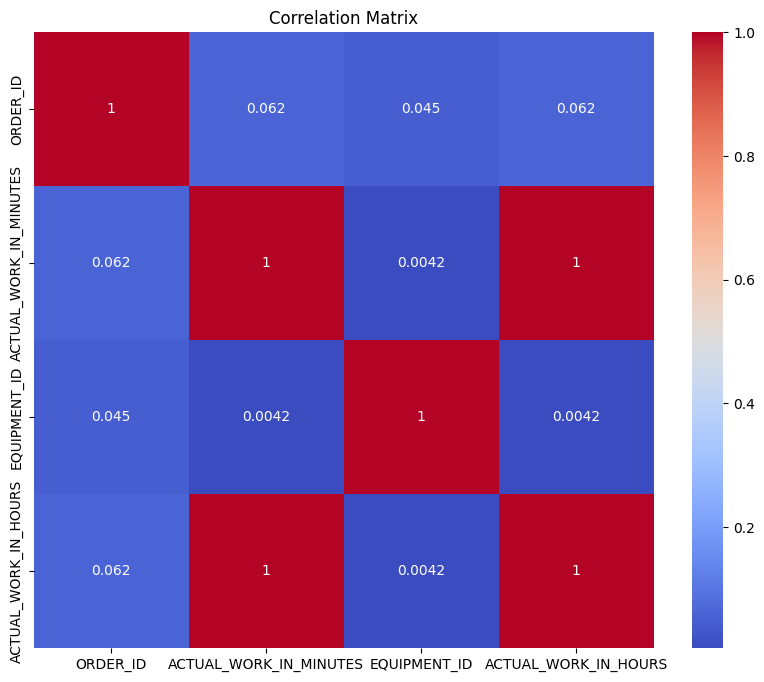

In [61]:
# Select only numeric columns
numeric_columns = cleaned_data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation and plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

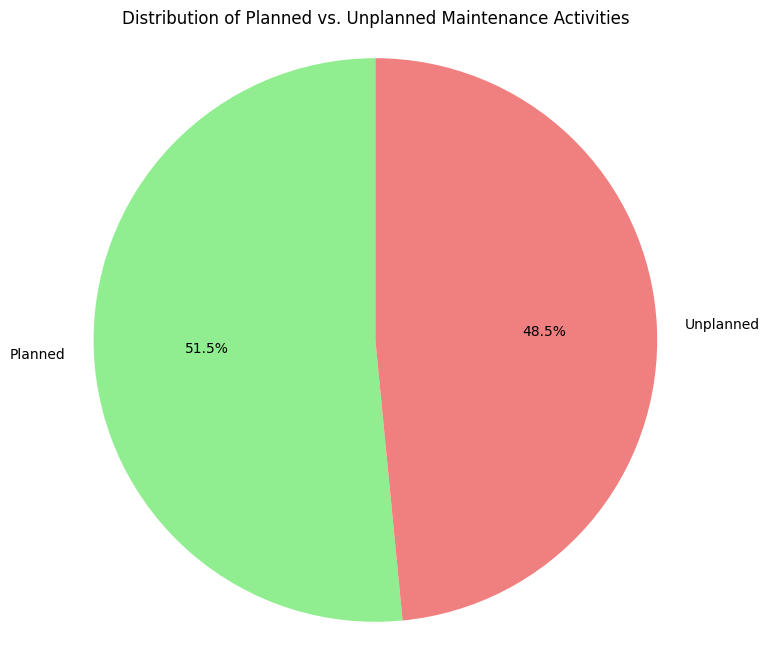

In [62]:
# Counting occurrences of each maintenance activity type
activity_type_counts = cleaned_data['MAINTENANCE_ACTIVITY_TYPE'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8,8))
plt.pie(activity_type_counts, labels=activity_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Distribution of Planned vs. Unplanned Maintenance Activities')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


AttributeError: module 'matplotlib.pyplot' has no attribute 'tight_'

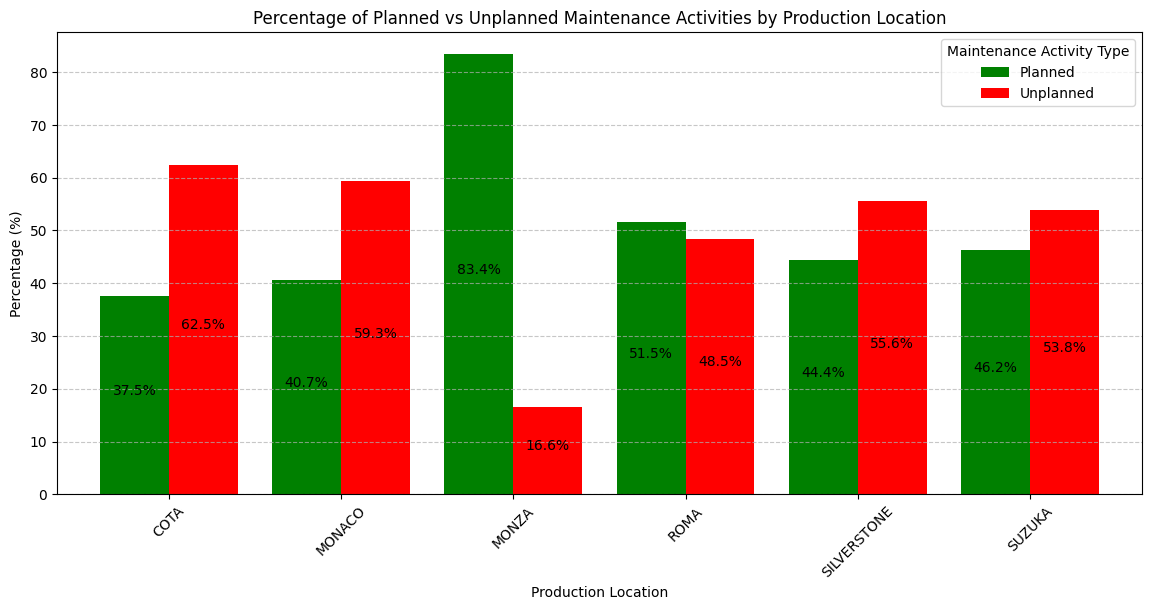

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

# Group the data by Production Location and Maintenance Activity Type, then count the occurrences
grouped_data = cleaned_data.groupby(['PRODUCTION_LOCATION', 'MAINTENANCE_ACTIVITY_TYPE']).size().reset_index(name='Count')

# Calculate the total counts for each production location
total_counts = grouped_data.groupby('PRODUCTION_LOCATION')['Count'].transform('sum')

# Calculate the percentage of each maintenance activity type within each production location
grouped_data['Percentage'] = (grouped_data['Count'] / total_counts) * 100

# Pivot the data to create columns for each maintenance activity type with percentages
pivot_data = grouped_data.pivot(index='PRODUCTION_LOCATION', columns='MAINTENANCE_ACTIVITY_TYPE', values='Percentage').fillna(0)

# Define custom colors for the bars
custom_colors = ['green', 'red']

# Plotting the grouped bar plot with custom colors
ax = pivot_data.plot(kind='bar', figsize=(14, 6), color=custom_colors, width=0.8)
plt.title('Percentage of Planned vs Unplanned Maintenance Activities by Production Location')
plt.xlabel('Production Location')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Maintenance Activity Type', loc='upper right')

# Annotate each bar with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, padding=3)

plt.tight_


<ipython-input-65-14020d9c8ba2>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=cleaned_data, x='YEAR', y='ACTUAL_WORK_HOURS', ci=None, estimator='mean', marker='o')


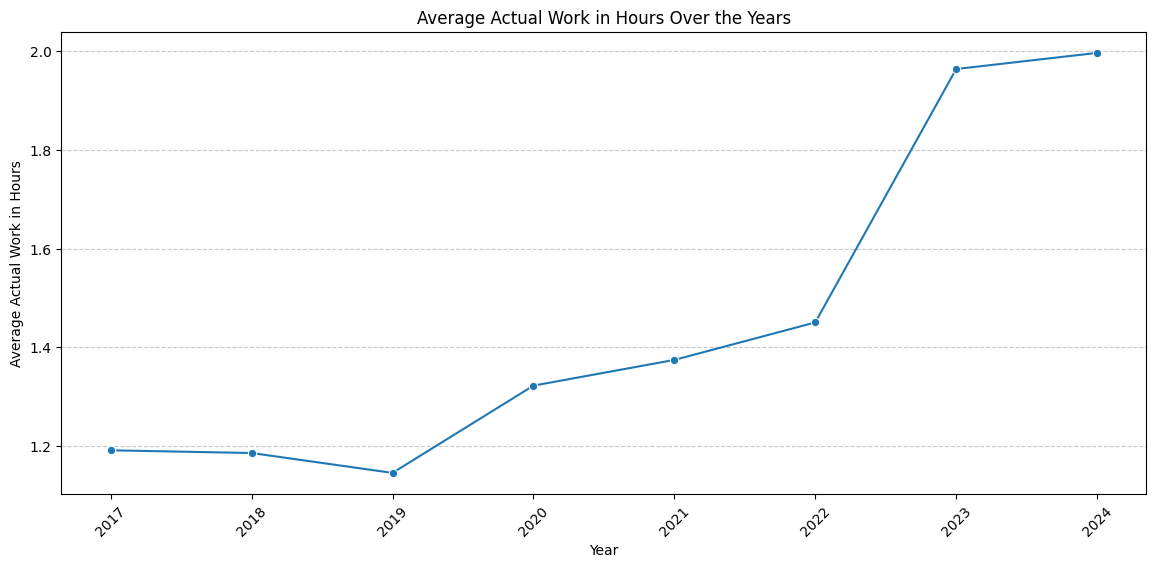

In [65]:
# Ensure date columns are in datetime format
cleaned_data['EXECUTION_FINISH_DATE'] = pd.to_datetime(cleaned_data['EXECUTION_FINISH_DATE'])

# Convert actual work minutes to hours
cleaned_data['ACTUAL_WORK_HOURS'] = cleaned_data['ACTUAL_WORK_IN_MINUTES'] / 60  # Convert minutes to hours

# Extract year from the execution finish date
cleaned_data['YEAR'] = cleaned_data['EXECUTION_FINISH_DATE'].dt.year

# Plotting a Line Plot with trend lines to show the average work time per year
plt.figure(figsize=(14, 6))
sns.lineplot(data=cleaned_data, x='YEAR', y='ACTUAL_WORK_HOURS', ci=None, estimator='mean', marker='o')
plt.title('Average Actual Work in Hours Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Actual Work in Hours')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

# **Conclusion**

Our analysis of the maintenance dataset identified substantial data quality issues, including missing values and inconsistent task descriptions, which were addressed through imputation and standardization. The EDA revealed key opportunities to optimize maintenance operations by addressing significant data quality issues, including missing values and inconsistent task descriptions. Through data cleaning and standardization, we improved the accuracy of maintenance logs, particularly in routine checks and equipment-specific tasks. This enables clearer insights into task frequency and performance, supporting more efficient scheduling and resource allocation. Moving forward, implementing standardized maintenance logging and regular audits will enhance data reliability. With the cleaned data, the company is well-positioned to explore predictive maintenance, reducing equipment downtime and improving operational efficiency.


# Group member contribution




Gautam Nair -  Performed Data Cleaning, Exploratory Data Analytics

Sanket Janolkar - Performed extensive Data Claeaning and provided Imputations

Sarvesh Keluskar - Performed Data Visualisations generating insights from Data

Nishigandha Tayade -Cleaned and imputed data, finding key insights within the data and performing visualizations of the same




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/Final_EDA.ipynb" ./
!jupyter nbconvert --to html "Final_EDA.ipynb"